<a href="https://colab.research.google.com/github/da-head0/Female-led-Korean-Films/blob/master/Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 전처리

In [148]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,519 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146364 files and d

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

In [150]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [151]:
del df['Unnamed: 0']

In [152]:
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [153]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [154]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [155]:
#기존 Year열 데이터를 바탕으로 NaN값을 채워줌

df.Year = df.Year.interpolate(method='pad', limit=2) 

In [156]:
#Year 행 정수로 변환

df = df.astype({'Year': 'int'}) 

In [157]:
# 연도 맞춰주기

for i, year in enumerate(df['Year']):
  if year <50:
    df.loc[i,'Year'] = year + 2000
  if (50<= year <100 ):
    df.loc[i,'Year'] = year + 1900
  else:
    continue


In [158]:
df.groupby(by='Year').count().head(60)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
1980,10,10,9,10,10,10,10,10
1981,46,46,46,46,46,46,46,46
1982,37,37,37,37,37,37,37,37
1983,17,17,17,17,17,17,17,17
1984,14,14,14,14,14,14,14,14
1985,14,14,14,14,14,14,14,14
1986,21,21,21,21,21,21,21,21
1987,16,16,16,16,16,16,16,16
1988,15,15,15,15,15,15,15,15


자료는 1980년부터 2020년까지 있지만, 2017년 출시된 게임은 3개, 2020년에 출시된 게임은 1개 있다는 것에 유의한다.

In [159]:
for col in sales_df.columns:
  df[col] = df[col].str.replace('M','')  # remove M

In [160]:
# K값 지우고 해당 열에 대해 0.001배
for col in sales_df.columns:
  for i, sale in enumerate(df[col]):
    if sale.endswith('K'):
      df.loc[i,col] = float(df.loc[i,col].replace('K',''))*0.001
    else:
      continue

In [161]:
# Sales 칼럼들 숫자형으로 변환
for col in sales_df.columns:
  df[col] = pd.to_numeric(df[col])
  df[col] = df[col]*1000 #기본 단위를 K로 변경

In [162]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [163]:
df['Name'] = df['Name'].str.replace('챕','e') #이름에 한글 들어간 거 지워주기
df['Name'] = df['Name'].str.replace('징','')

In [164]:
df.groupby(by='Platform').count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,,,,
2600,133,133,132,133,133,133,133,133
3DO,3,3,3,3,3,3,3,3
3DS,509,509,508,507,509,509,509,509
DC,52,52,52,52,52,52,52,52
DS,2163,2163,2159,2156,2163,2163,2163,2163
GB,98,98,98,98,98,98,98,98
GBA,822,822,820,796,822,822,822,822
GC,556,556,555,556,556,556,556,556
GEN,27,27,27,27,27,27,27,27


2600은 Atari 2600을 말하는 거 같다. 1977년 10월 발매된 가정용 게임기로 마이크로프로세서와 카트리지 방식을 사용하였다고.

In [165]:
#세일즈 매출에 대한 합계, 평균 계산하기
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Sales_Sum'] = df['NA_Sales']+df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales_Mean'] = df['Sales_Sum']/4

In [166]:
df[(df.Genre.isnull()) & (df['Sales_Mean']>500)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170.0,4050.0,4340.0,790.0,14350.0,3587.5
4598,Wii Party,Wii,2010,NaN,Nintendo,1790.0,3530.0,2490.0,680.0,8490.0,2122.5
9488,Final Fantasy XII,PS2,2006,NaN,Square Enix,1880.0,0.0,2330.0,1740.0,5950.0,1487.5
12331,Onimusha: Warlords,PS2,2001,NaN,Virgin Interactive,990.0,480.0,1090.0,140.0,2700.0,675.0
15526,Bloodborne,PS4,2015,NaN,Sony Computer Entertainment,1000.0,760.0,260.0,360.0,2380.0,595.0
16587,Need for Speed Underground 2,XB,2004,NaN,Electronic Arts,1380.0,800.0,0.0,100.0,2280.0,570.0


In [167]:
df.iloc[1971,3] = 'Role-Playing'
df.iloc[4598,3] = 'Misc' #Wii Party	- Party인데 일단 Misc로 넣음.
df.iloc[9488,3] = 'Role-Playing'
df.iloc[12331,3] = 'Action'
df.iloc[15526,3] = 'Action' #Action role-playing game 이지만 action으로 분류
df.iloc[16587,3] = 'Racing'

매출 평균치 500 이상 값들은 장르를 찾아서 채워줬다. 1000 이상만 채워줘도 될 것 같았다... ㅎ

In [168]:
df = df.dropna(axis=0) #결측치 들어간 행 제거, 100개 정도

In [169]:
df.shape

(16496, 11)

In [170]:
df = df.reset_index(drop=True) #인덱스 리셋해줌

In [171]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0,10.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,45.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,5.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,10.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,62.5
...,...,...,...,...,...,...,...,...,...,...,...
16491,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0,50.0
16492,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0,2.5
16493,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0,197.5
16494,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0,95.0


In [172]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
count,16496.00000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2006.41507,265.277037,147.062924,78.062561,48.214719,538.617241,134.654310
std,5.83078,818.924088,506.726898,310.109122,189.068828,1559.439515,389.859879
min,1980.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,0.000000,0.000000,0.000000,0.000000,60.000000,15.000000
50%,2007.00000,80.000000,20.000000,0.000000,10.000000,170.000000,42.500000
75%,2010.00000,240.000000,110.000000,40.000000,40.000000,480.000000,120.000000
max,2020.00000,41490.000000,29020.000000,10220.000000,10570.000000,82740.000000,20685.000000


게임 데이터셋의 피쳐별 정보를 볼 수 있다. 
표준편차는 매출의 합계와, 북미 매출에서 가장 크다. 

# 지역에 따라서 선호하는 게임 장르가 다를까?

클러스터링, K_MEANS 지역별로 해보면 되겠군

In [173]:
df1 = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] #장르, 매출만 모아서 1번 문제 df 생성
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40.0,0.0,0.0,0.0
1,Action,170.0,0.0,0.0,10.0
2,Adventure,0.0,0.0,20.0,0.0
3,Misc,40.0,0.0,0.0,0.0
4,Platform,120.0,90.0,0.0,40.0
...,...,...,...,...,...
16491,Platform,150.0,40.0,0.0,10.0
16492,Action,10.0,0.0,0.0,0.0
16493,Sports,440.0,190.0,30.0,130.0
16494,Action,50.0,50.0,250.0,30.0


#T-Test

In [174]:
df1genremean = df1.groupby(by='Genre').mean() #지역별로 장르별 매출 평균
df1genremean #단위 : K

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,265.609091,158.581818,48.118182,56.642424
Adventure,82.703762,50.156740,40.650470,13.173981
Fighting,262.165680,118.485207,103.360947,42.840237
Misc,236.692037,125.199063,63.067916,43.688525
Platform,506.167800,228.015873,148.129252,58.424036
Puzzle,213.778163,87.902946,98.561525,21.698440
Racing,288.471440,191.383749,45.374095,62.107804
Role-Playing,220.222522,126.513823,237.066757,40.114633
Shooter,445.566616,239.678407,29.310873,78.598775


In [175]:
import scipy.stats as stats
from scipy.stats import f_oneway #perform one-way ANOVA
F_statistic, pVal = stats.f_oneway(df1genremean.NA_Sales,df1genremean.EU_Sales,df1genremean.JP_Sales,df1genremean.Other_Sales) 

print('4개 그룹데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

4개 그룹데이터의 일원분산분석 결과 : F=19.5, p=0.00000


In [176]:
import scipy.stats as stats
print("북미와 유럽 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.EU_Sales))
print("북미와 일본 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.JP_Sales))
print("북미와 타지역 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.Other_Sales))
print("유럽과 일본 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.EU_Sales,df1genremean.JP_Sales))
print("유럽과 타지역 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.EU_Sales,df1genremean.Other_Sales))
print("일본과 타지역 장르별 매출 비교 : ", stats.ttest_ind(df1genremean.JP_Sales,df1genremean.Other_Sales))

북미와 유럽 장르별 매출 비교 :  Ttest_indResult(statistic=3.0997684915896926, pvalue=0.005227945263254573)
북미와 일본 장르별 매출 비교 :  Ttest_indResult(statistic=4.545991798622155, pvalue=0.00015897851878688562)
북미와 타지역 장르별 매출 비교 :  Ttest_indResult(statistic=6.136686717699735, pvalue=3.5471492141039427e-06)
유럽과 일본 장르별 매출 비교 :  Ttest_indResult(statistic=2.3259723525160783, pvalue=0.02963209576399035)
유럽과 타지역 장르별 매출 비교 :  Ttest_indResult(statistic=5.3708957028277, pvalue=2.1564403293846478e-05)
일본과 타지역 장르별 매출 비교 :  Ttest_indResult(statistic=2.3046327528955852, pvalue=0.031003392257502534)


#지역별- 장르별 매출 순위

In [177]:
df1genresum = df1.groupby(by='Genre').sum() #지역별로 장르별 매출 합계
df1genresum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,876510.0,523320.0,158790.0,186920.0
Adventure,105530.0,64000.0,51870.0,16810.0
Fighting,221530.0,100120.0,87340.0,36200.0
Misc,404270.0,213840.0,107720.0,74620.0
Platform,446440.0,201110.0,130650.0,51530.0
Puzzle,123350.0,50720.0,56870.0,12520.0
Racing,358570.0,237890.0,56400.0,77200.0
Role-Playing,326590.0,187620.0,351570.0,59490.0
Shooter,581910.0,313020.0,38280.0,102650.0


In [178]:
# 장르별 순위 매기기
rank_by_sales = pd.DataFrame()
rank_by_sales['NA'] = df1genresum['NA_Sales'].rank(ascending=False)
rank_by_sales['JP'] = df1genresum['JP_Sales'].rank(ascending=False)
rank_by_sales['EU'] = df1genresum['EU_Sales'].rank(ascending=False)
rank_by_sales['Other'] = df1genresum['Other_Sales'].rank(ascending=False)
rank_by_sales.sort_values(by='NA')

,NA,JP,EU,Other
Genre,,,,
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Shooter,3.0,12.0,3.0,3.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Racing,6.0,9.0,4.0,4.0
Role-Playing,7.0,1.0,7.0,6.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0


지역별 장르의 매출 순위이다. 

#지역별 - 게임 장르별 매출 합계 그래프

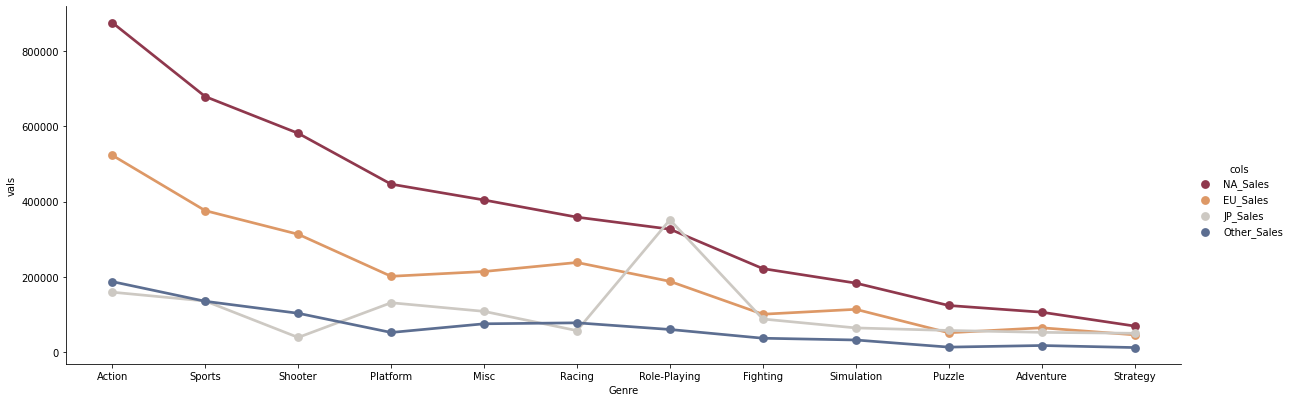

In [220]:
# 지역별 - 게임 장르별 매출 합계 그래프

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) #북미지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#dd9866", "NA_Sales":"#8f384d", "Other_Sales":"#5c6e91", "JP_Sales":"#cdc9c3"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

👉 북미지역은 가장 매출이 높은 지역이다. 북미 지역의 매출 순위로 다른 지역들의 매출을 그려 보면, 북미와 유럽, 다른 지역의 장르별 매출액 그래프는 유사한 라인을 그리는 것을 볼 수 있다.

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다. (기타지역에서도 레이싱 게임은 4위다.)


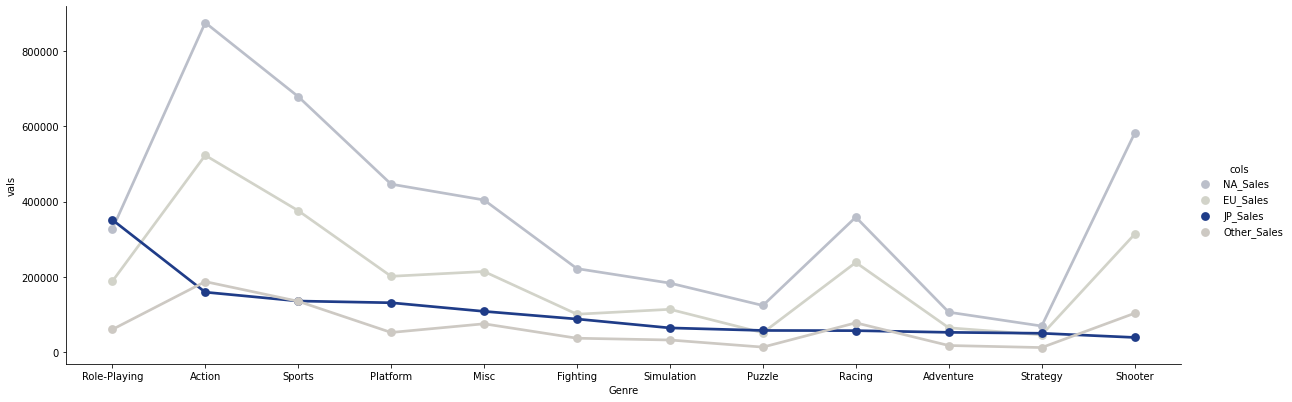

In [180]:
df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) #일본지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#d2d3c9", "NA_Sales":"#bbbfca", "Other_Sales":"#cdc9c3", "JP_Sales":"#1f3c88"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

일본 지역을 기준으로 장르별 매출을 재정렬했다.

In [181]:
rank_by_sales.sort_values(by='JP') # 장르별 매출 순위 - 일본 기준

,NA,JP,EU,Other
Genre,,,,
Role-Playing,7.0,1.0,7.0,6.0
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0
Puzzle,10.0,8.0,11.0,11.0
Racing,6.0,9.0,4.0,4.0


👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다. 

레이싱 게임의 경우 다른 지역에서는 매출 4-6위인 반면, 일본에서는 9위로 인기 있는 편이 아니다.

반면 일본을 제외한 다른 지역에서 가장 인기 없는 장르는 전략(Strategy)이다.

# 지역별 매출 그래프 상세

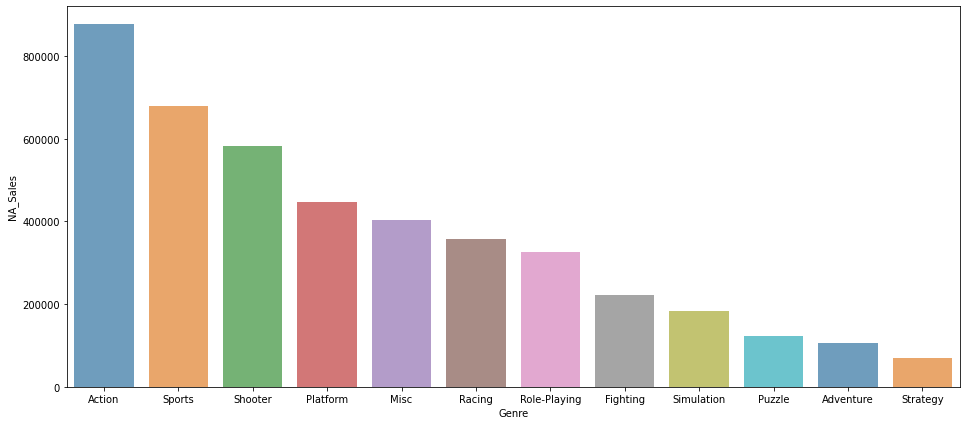

In [182]:
#북미지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="NA_Sales", palette="tab10", alpha=.7);

👉 북미지역은 가장 매출이 높은 지역이다. 
액션, 스포츠, 사격, 플랫폼 게임이 강세를 보인다. 

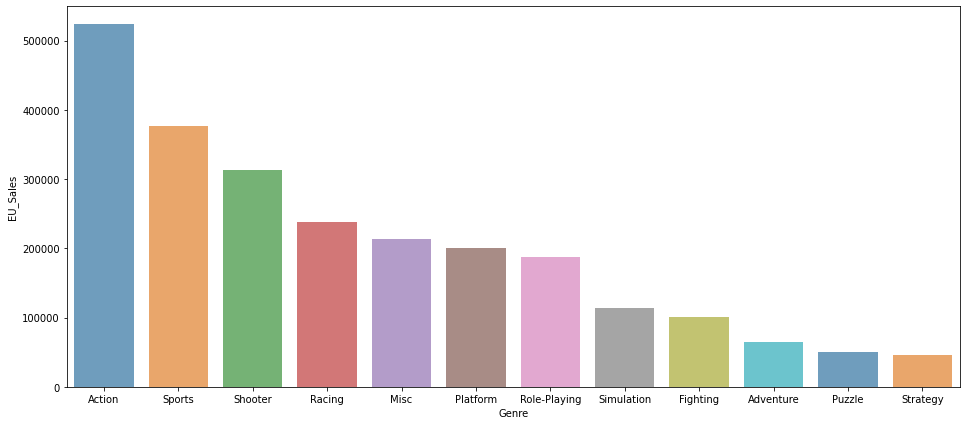

In [183]:
#유럽지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='EU_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="EU_Sales", palette="tab10", alpha=.7);

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다.



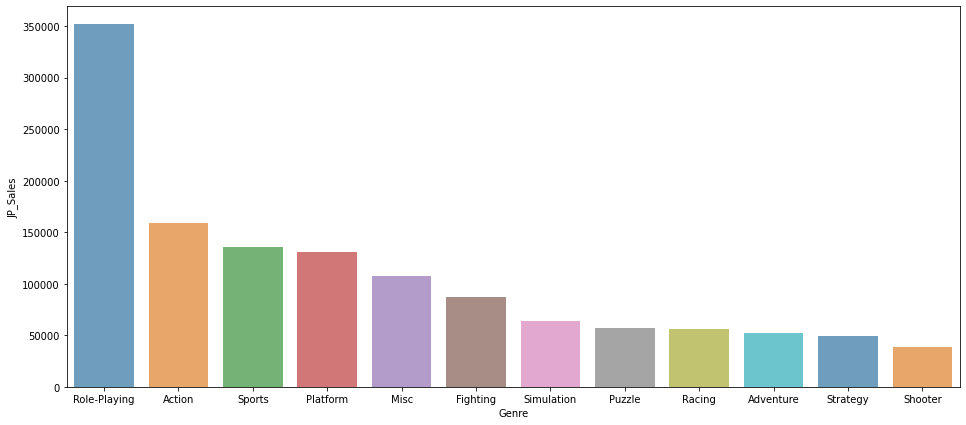

In [184]:
#일본 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="JP_Sales", palette="tab10", alpha=.7);

👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다.

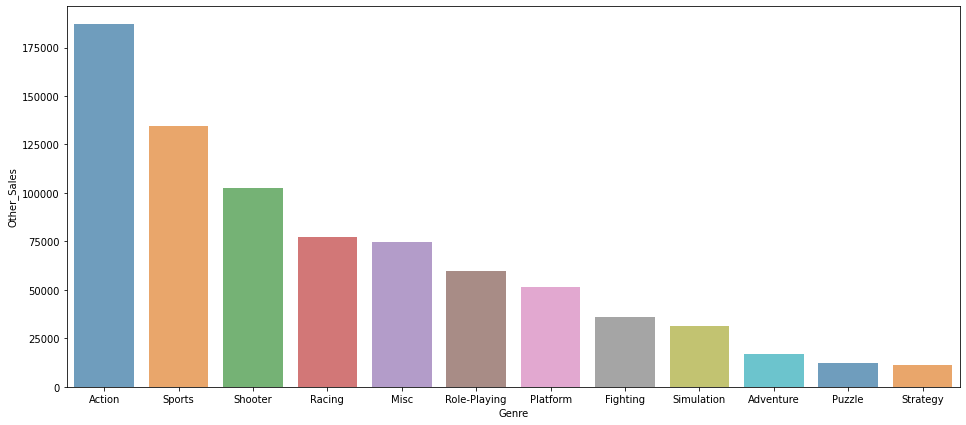

In [185]:
#기타지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='Other_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="Other_Sales", palette="tab10", alpha=.7);

# 연도별 게임의 트렌드가 있을까?

In [186]:
# 총매출 순위별로 정렬한 df 만들기

df2 = df.sort_values(by='Sales_Sum', ascending=False)[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Sales_Sum']].reset_index()
del df2['index']
df2

,Name,Platform,Year,Genre,Publisher,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380.0
...,...,...,...,...,...,...
16491,Ouka Sengoku Portable,PSP,2012,Adventure,Alchemist,10.0
16492,Palais de Reine,PS2,2007,Strategy,Interchannel-Holon,10.0
16493,DoDonPachi Saidaioujou,X360,2013,Shooter,Cave,10.0
16494,Fate/kaleid liner Prisma Illya,3DS,2014,Action,Kadokawa Games,10.0


In [ ]:
yearcount = df2.groupby(by="Year").Name.count() #연도별 출시된 게임 숫자

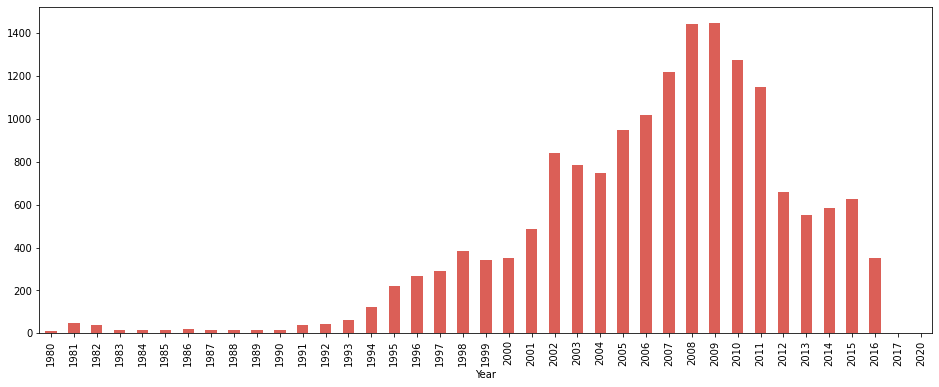

In [188]:
yearcount.plot(kind='bar', figsize=(16, 6));

94년도부터 한 해 출시되는 게임은 100개가 넘어, 2008-2009년에는 출시된 게임의 수가 가장 많았다. 2009년 이후부터는 하락세를 보인다.

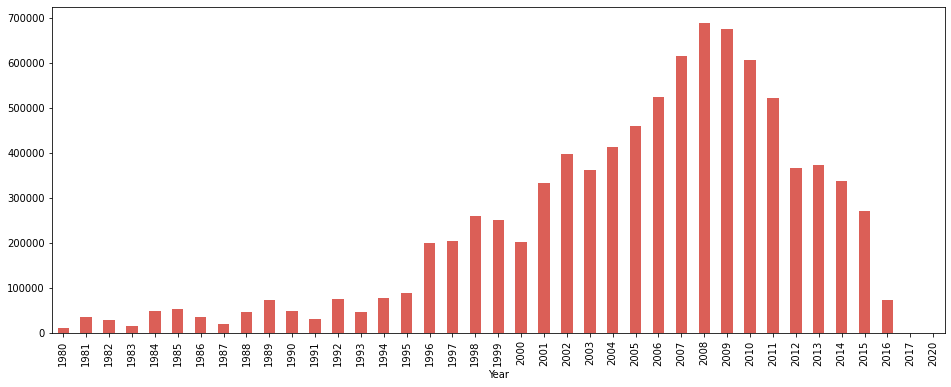

In [189]:
#연도별 게임 산업 매출 총액(모든 지역)

yearsales = df2.groupby(by="Year").Sales_Sum.sum()
yearsales.plot(kind='bar', figsize=(16, 6));

연도별 게임의 판매 총액 그래프다. 역시 2008-2009년이 매출이 가장 높아, 게임의 전성기였다는 것을 알 수 있다. 2008년 이후 하락세를 보인다. 

연도별 출시 게임 수는 1991년 이후 증가했는데, 그 전까지 게임의 매출은 들쭉날쭉했지만 어느정도 수요가 있었다. 1991년 이후,  발매되는 게임 수 증가와 더불어 매출 역시 비슷한 그래프를 그리며 늘었다.

흥미로운 점은 2013-2015년에 연도별 출시되는 게임의 수는 늘었지만, 게임의 매출은 계속 하락했다는 것이다. 

## 연도별 발매된 게임 장르 수 계산

In [190]:
#연도별 발매된 게임 장르 숫자 계산
yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre = yeargenre.iloc[:,0:3].rename(columns={'Name': 'Count'})
yeargenre

,Year,Genre,Count
0,1980,Action,2
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [191]:
#연도순으로 나눠줌
early = df2[df2['Year'] <1995]
mid = df2[(1995<= df2['Year']) & (df2['Year']<2010)]
late = df2[df2['Year'] >=2010]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


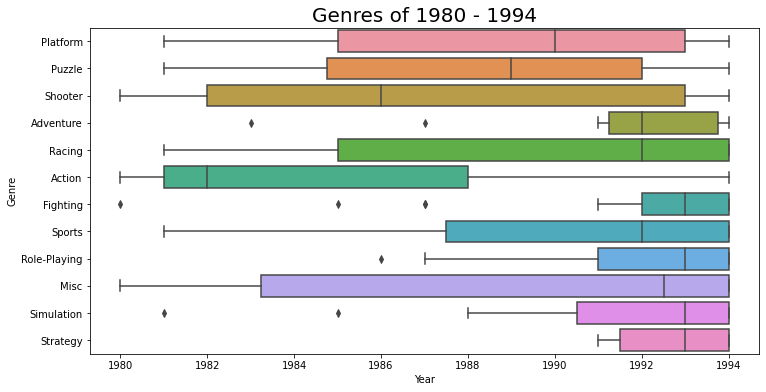

In [192]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = early.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1980 - 1994', fontsize = 20);

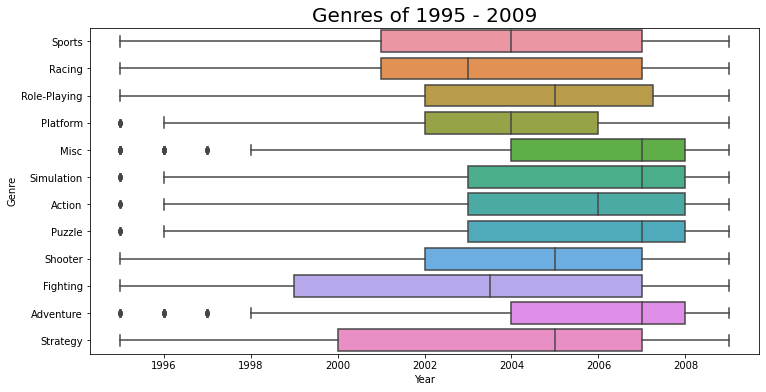

In [193]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = mid.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1995 - 2009', fontsize = 20);

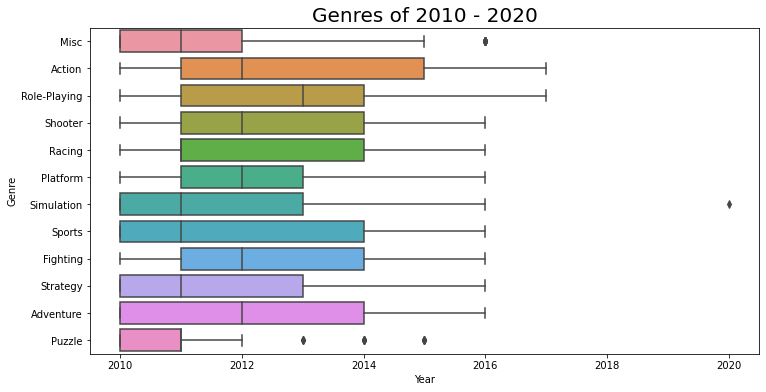

In [194]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = late.reset_index(), x='Year', y='Genre');
plt.title('Genres of 2010 - 2020', fontsize = 20);

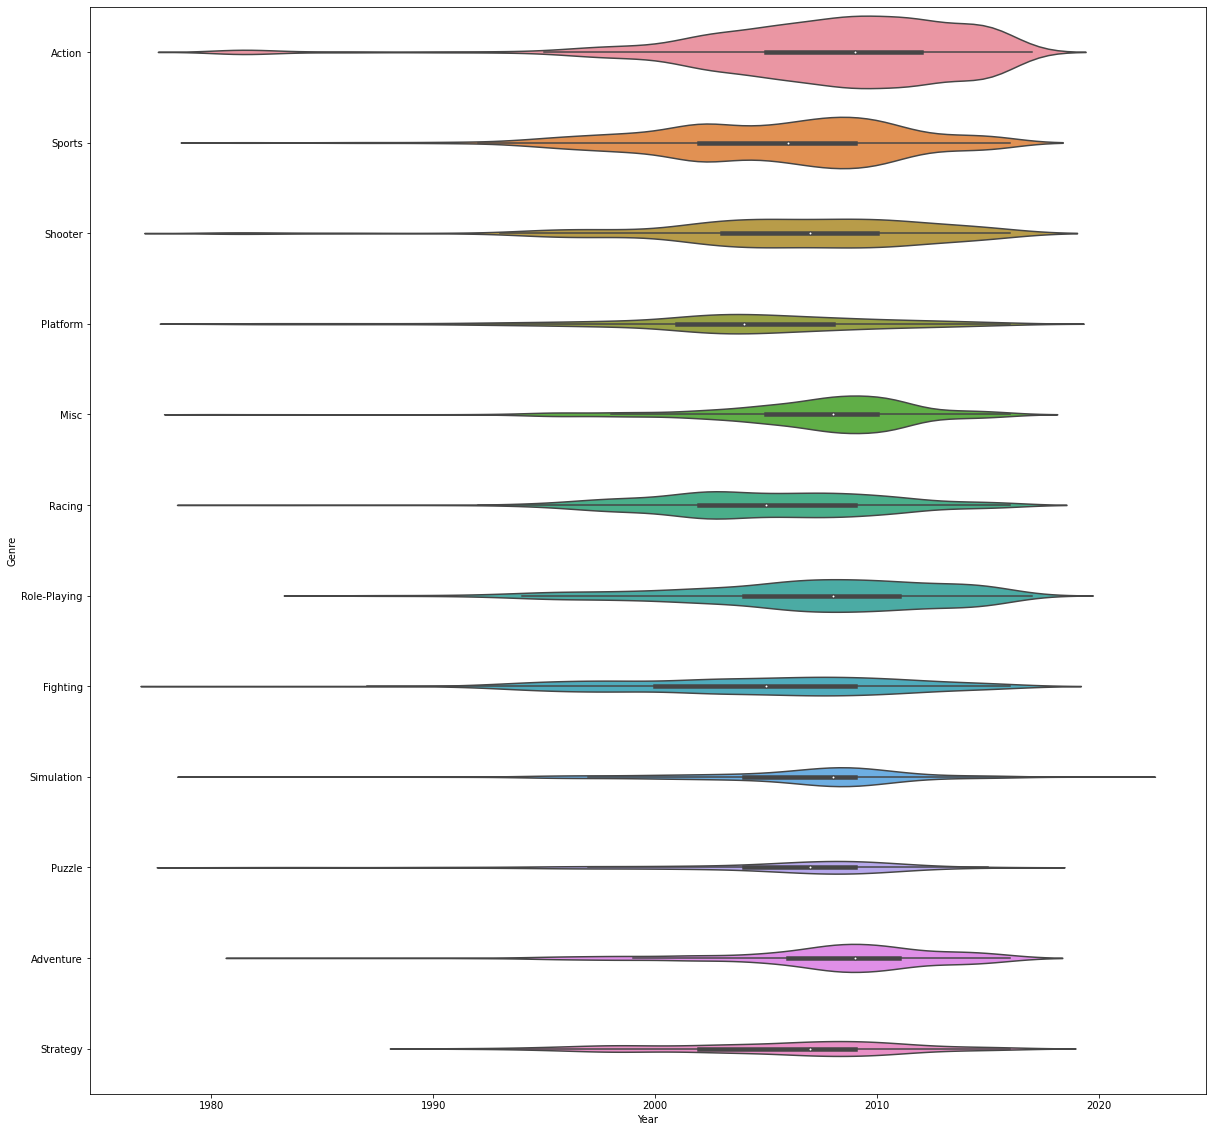

In [195]:
plt.figure(figsize=(20, 20))
sns.violinplot(data = df2, x='Year', y='Genre', scale="count",
               order=[ "Action", "Sports", "Shooter", "Platform", "Misc", "Racing", "Role-Playing", "Fighting", "Simulation", "Puzzle", "Adventure", 'Strategy']); # 카운트로 발매된 수로 넓이 조절

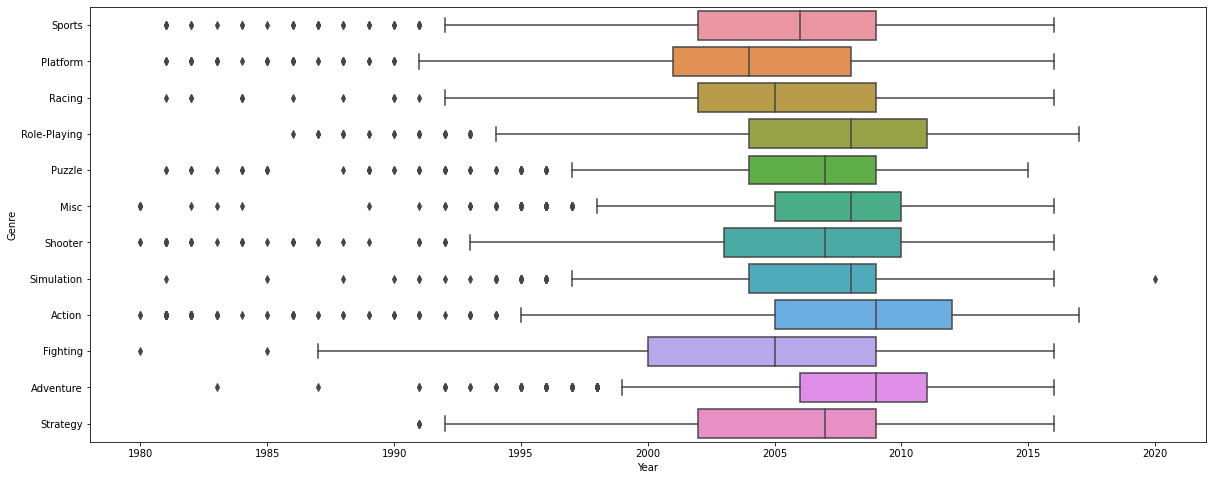

In [196]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = df2, x='Year', y='Genre');

매출의 아웃라이어들은 대박게임이다. 
액션과 롤플레잉의 경우 히트가 난 다음 게임 생산이 늘었다.

## 연도별 발매된 게임의 총 매출 그래프

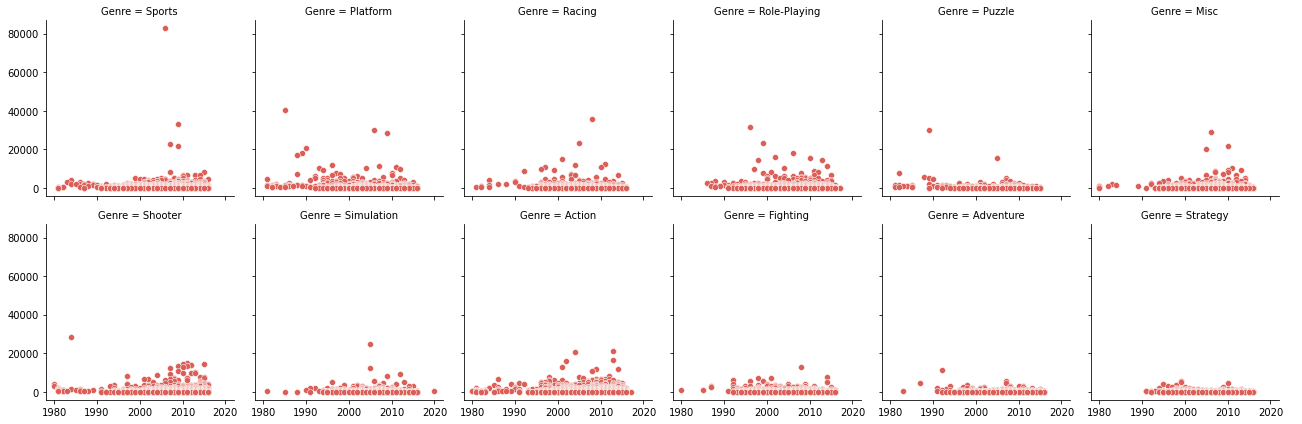

In [ ]:
# 장르별 연도별 총매출
g = sns.FacetGrid(data=df2, col='Genre', col_wrap=6)

g.map_dataframe(
    sns.scatterplot,
    x='Year',  y='Sales_Sum',
    data = large_df
)
g.add_legend();

###매출 탑 100위 게임의 연도별 분포 (뺄까?)

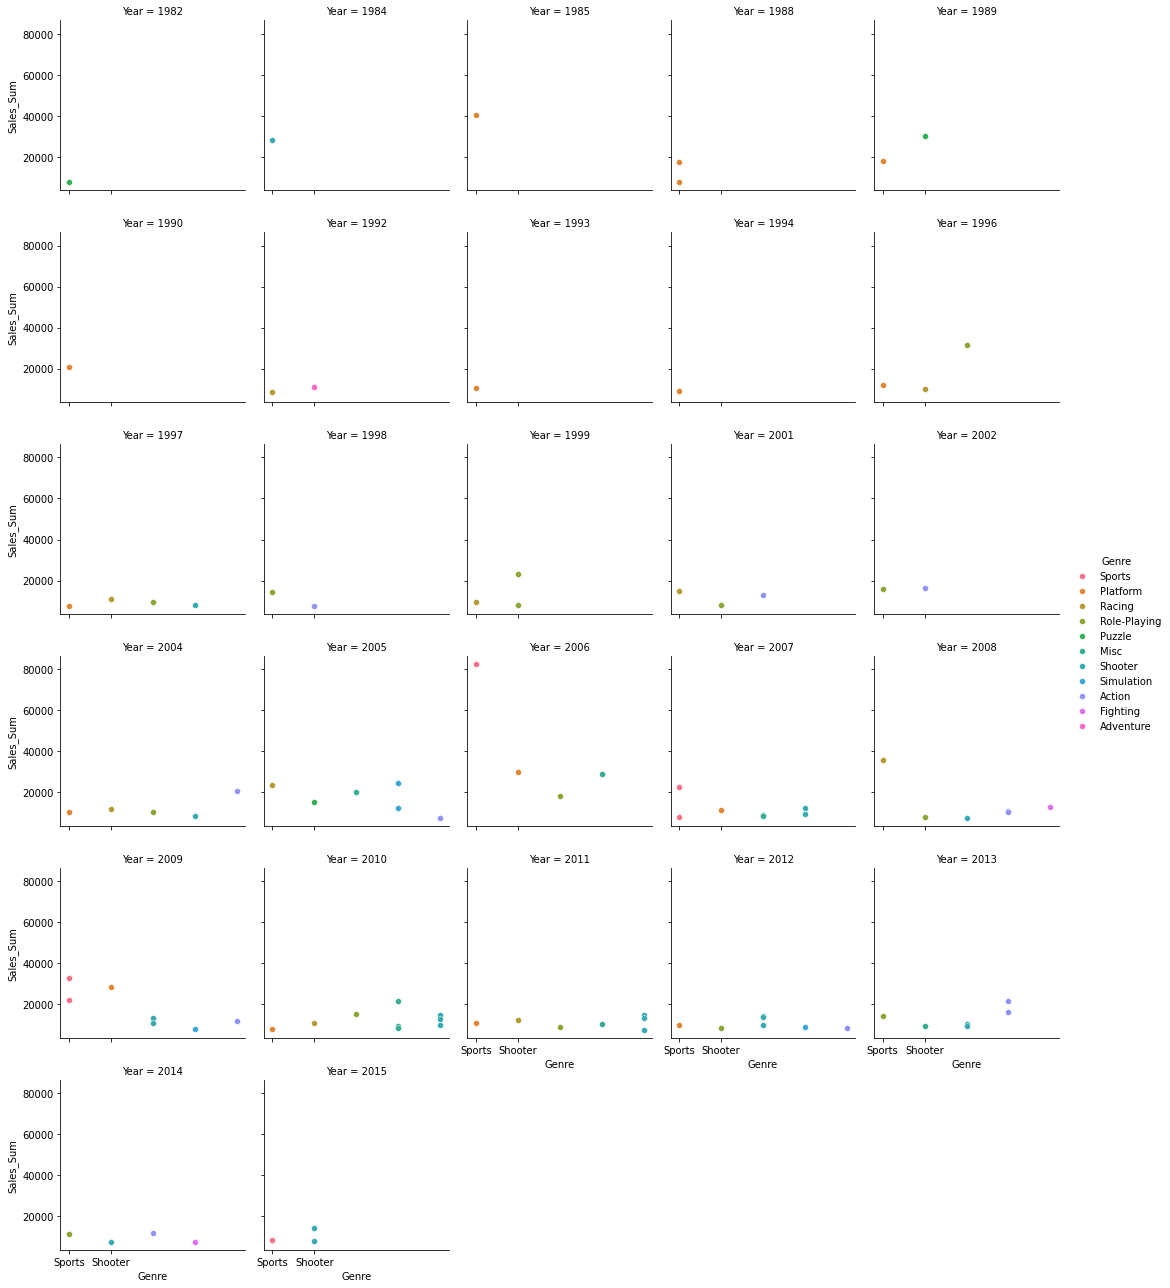

In [197]:
# 매출 탑 100위 게임의 연도별 분포

color = sns.color_palette("hls")
sns.set_palette(color)

fa = sns.FacetGrid(df.sort_values(by=["Sales_Sum"], ascending=False).head(100), col="Year", col_wrap=5, hue='Genre'); #hue는 지역으로 넣을 수 있을 것 같은데...
fa.map(sns.scatterplot, "Genre", "Sales_Sum")

fa.add_legend()

전성기인 2009-2013년에 역대 매출 탑 100위 안에 드는 게임이 더 빈번하게 나왔다.

2016년 이후에는 매출 탑 100위 안에 드는 게임이 없다.(데이터 셋 상)


### 연도별 플랫폼 매출 비교

In [198]:
df.groupby(by=["Year",'Platform']).count()

Name  Genre  Publisher  ...  Other_Sales  Sales_Sum  Sales_Mean
Year Platform                          ...                                    
1980 2600         8      8          8  ...            8          8           8
     X360         1      1          1  ...            1          1           1
1981 2600        46     46         46  ...           46         46          46
1982 2600        36     36         36  ...           36         36          36
     PS2          1      1          1  ...            1          1           1
...             ...    ...        ...  ...          ...        ...         ...
2016 X360         8      8          8  ...            8          8           8
     XOne        54     54         54  ...           54         54          54
2017 PS4          1      1          1  ...            1          1           1
     PSV          2      2          2  ...            2          2           2
2020 DS           1      1          1  ...            1          1           1

[328 rows x 9 columns]

In [199]:
large_df = df[df['Platform'].str.contains('PS2|DS|PS3|Wii|X360|PSP|PS|PC|XB|GBA|GC|3DS|PSV|PS4')] #300개 이하 플랫폼 제외
large_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0,10.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,45.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,5.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,10.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,62.5
...,...,...,...,...,...,...,...,...,...,...,...
16491,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0,50.0
16492,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0,2.5
16493,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0,197.5
16494,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0,95.0


In [200]:
large_df = large_df[large_df['Platform'] !='PCFX']

In [201]:
large_df.groupby(by=['Platform']).count().sort_values(by="Name", ascending=False).T

Platform,PS2,DS,PS3,Wii,X360,PSP,PS,PC,XB,GBA,GC,3DS,PSV,PS4,WiiU
Name,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Year,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Genre,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Publisher,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
NA_Sales,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
EU_Sales,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
JP_Sales,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Other_Sales,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Sales_Sum,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143
Sales_Mean,2155,2152,1321,1319,1258,1207,1189,951,821,794,555,507,410,336,143


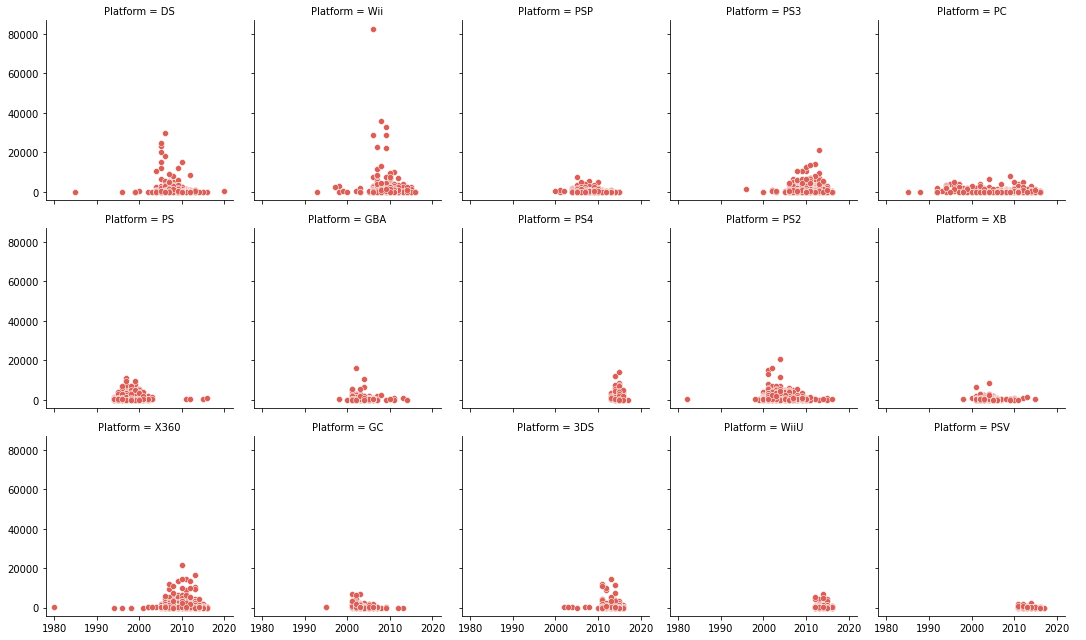

In [203]:
# 플랫폼별 연도별 총매출
g = sns.FacetGrid(data=large_df, col='Platform', col_wrap=5)

g.map_dataframe(
    sns.scatterplot,
    x='Year',  y='Sales_Sum',
    data = large_df
)
g.add_legend();

Wii에서 매출 1위 게임이 나왔다. DS도 히트한 게임을 어느정도 냈다.

GC, 3DS는 2000년 이후, 

WiiU, PS5는 2010년 이후 출시된 플랫폼이다.

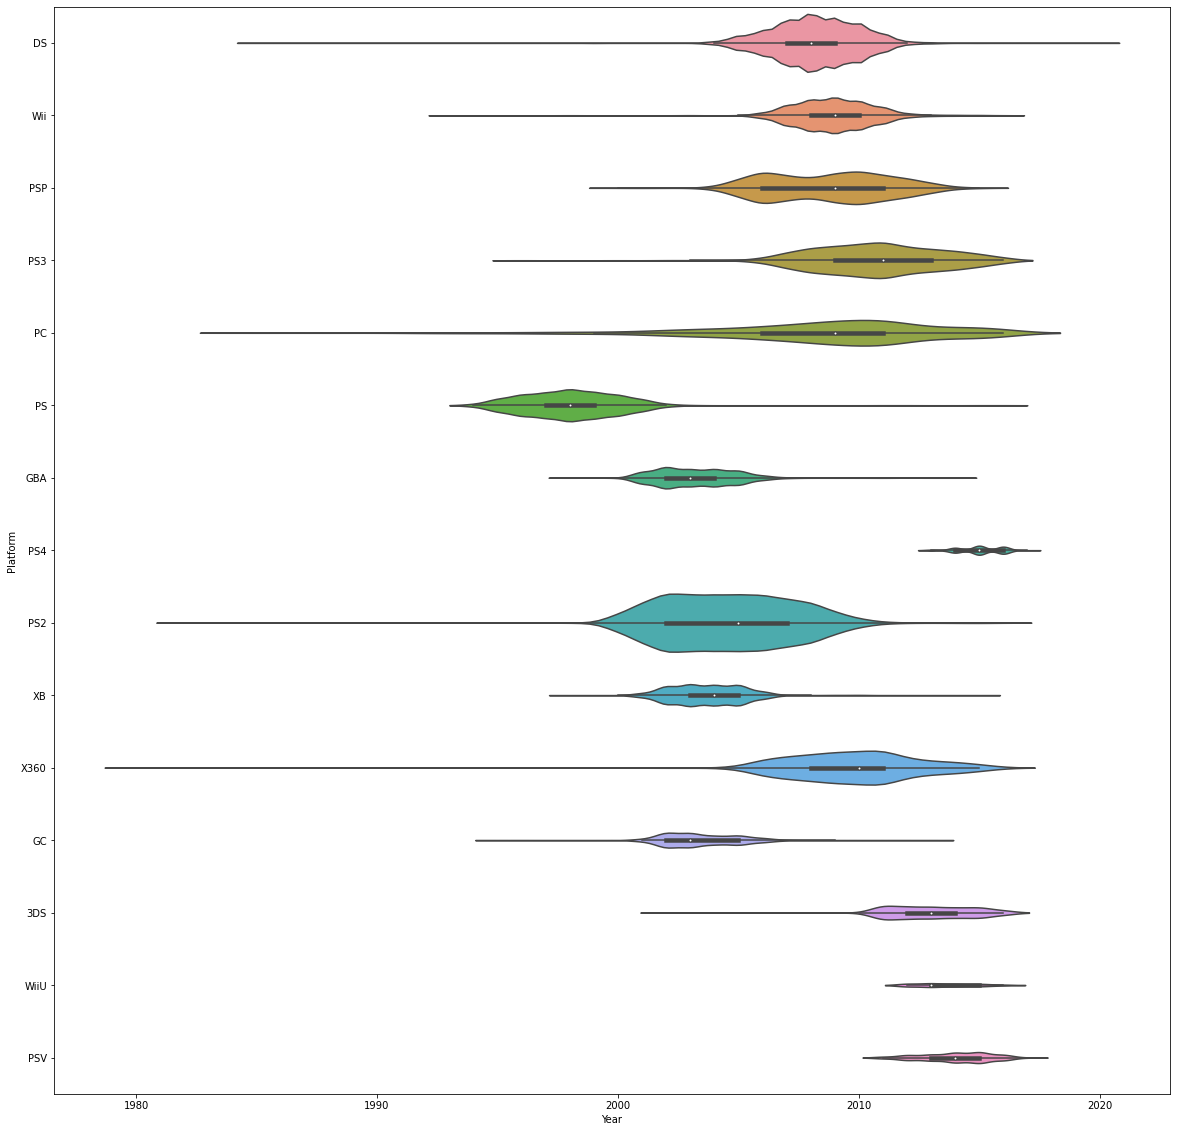

In [204]:
plt.figure(figsize=(20, 20))
sns.violinplot(data = large_df, x='Year', y='Platform', scale="count");

플랫폼별로 발매된 게임의 숫자의 연도별 바이올린플롯이다.

게임의 숫자라 매출과 비례하지는 않는다.

# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

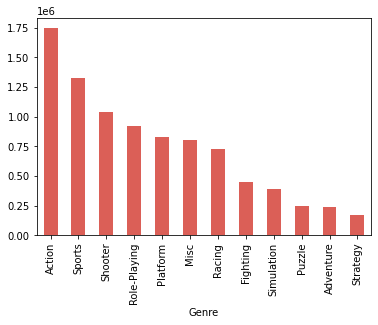

In [205]:
genre_sales_sum = df.groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False) #장르별 매출 총액
genre_sales_sum.plot(kind='bar'); #단위 : B

먼저 장르별로 매출 총액을 비교.

y축의 단위는 B이다. 액션 게임>스포츠>슈터>롤플레잉 순으로 매출이 높았는데,
롤플레잉의 경우 일본을 타깃으로 해야 하고, 액션은 최근에도 매출이 높았다. 

따라서 액션 장르를 만들어야 한다.

In [206]:
genre_sales_sum

Genre
Action          1745540.0
Sports          1325460.0
Shooter         1035860.0
Role-Playing     925270.0
Platform         829730.0
Misc             800450.0
Racing           730060.0
Fighting         445190.0
Simulation       391250.0
Puzzle           243460.0
Adventure        238210.0
Strategy         174550.0
Name: Sales_Sum, dtype: float64

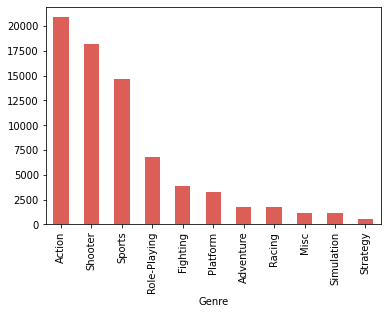

In [207]:
# 최근 5년간의 장르별 매출
df2[df2['Year'] >=2016].groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

최근 5년간 장르별 매출을 봐도 액션이 우세하다. 요새는 스포츠보다 사격 게임이 잘 팔린다.
장르는 액션 / 사격이 좋겠다.

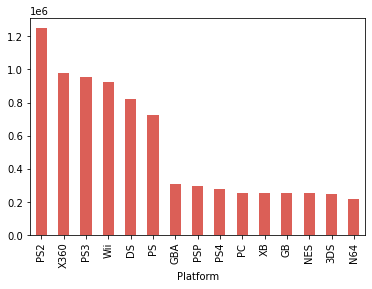

In [208]:
# 가장 매출 총액이 높은 플랫폼 탑 15
df.groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

의외로 PC 게임의 매출이 높지 않다.
PS2의 매출은 역대 최대지만, 2012년 단종되었다. 게임 시장의 전성기인 2008-2009년의 수혜를 입어, 다른 플랫폼들이 PS2의 매출을 넘지 못했다. 

엑스박스360도 단종되었다.

현재에도 단종되지 않고 게임이 잘 팔리는 플랫폼을 타깃으로 해야 한다. 

하지만 대부분 단종되어서 최근 매출을 볼 필요가 있음

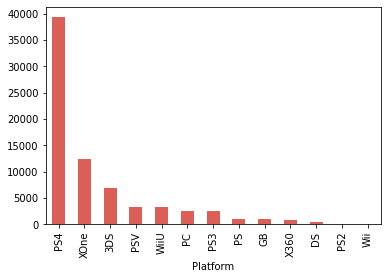

In [209]:
#최근 5년 기준 매출 총액이 높은 플랫폼 탑
df2[df2['Year'] >=2016].groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

2017년 이후 자료가 거의 없다. 최근 자료 필요

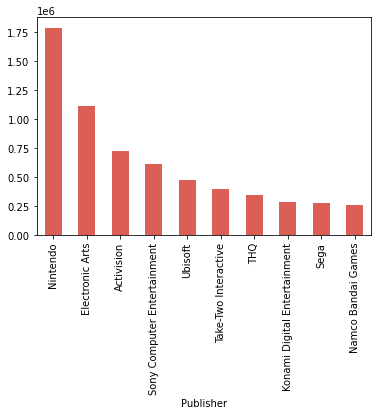

In [210]:
# 퍼블리셔 매출 총액 top 10
df.groupby(by=["Publisher"]).Sales_Sum.sum().sort_values(ascending=False).head(10).plot(kind='bar');

갓텐도... 갓텐도와 손잡자.

닌텐도 스위치, 3DS

최근 출시한 PS5도 괜찮겠다.

In [211]:
df.sort_values(by=["Sales_Sum"], ascending=False).head(25) #매출 탑 25위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
2895,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0,20685.0
4173,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0,10060.0
12504,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0,8957.5
3337,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0,8250.0
7784,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0,7845.0
1200,Tetris,GB,1989,Puzzle,Nintendo,23200.0,2260.0,4220.0,580.0,30260.0,7565.0
6897,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0,7502.5
3000,Wii Play,Wii,2006,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0,7252.5
16430,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0,7152.5
10431,Duck Hunt,NES,1984,Shooter,Nintendo,26930.0,630.0,280.0,470.0,28310.0,7077.5


In [212]:
top100 = df.sort_values(by=["Sales_Sum"], ascending=False).head(100)  # 매출 탑 100위 정렬
top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
2895,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0,20685.0
4173,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0,10060.0
12504,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0,8957.5
3337,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0,8250.0
7784,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0,7845.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3780.0,2170.0,1310.0,310.0,7570.0,1892.5
7451,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5390.0,1180.0,700.0,190.0,7460.0,1865.0
12775,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3240.0,1350.0,2420.0,430.0,7440.0,1860.0
10878,Call of Duty: World at War,X360,2008,Shooter,Activision,4790.0,1900.0,0.0,690.0,7380.0,1845.0


In [213]:
# Too100 게임 제목 중 가장 자주 나오는 단어 구하기
import re
wordcount = {}
for words in top100['Name']:
  wordList = re.split(' |:',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index')
word_df = word_df.rename(columns ={0:'Count'})
word_df.sort_values(by='Count', ascending=False).iloc[1:].head(20)

,Count
Mario,23
Super,18
of,16
Duty,14
Call,14
2,12
Pokemon,10
3,9
Auto,9
Theft,9


매출순위 탑 100 안에 드는 게임들의 제목에서 가장 많이 나온 단어는 다음과 같다.
슈퍼 마리오, 콜 오브 듀티, 포켓몬과 Wii가 들어간 게임 제목이 인기가 좋다.


시리즈물에 들어가는 2, 3이 보이는 점도 눈길을 끈다.

시리즈물은 다른 항목보다 매출이 높을까?


-> 다음 분기 때 어떤 게임을 만들까?

In [214]:
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #매출 탑 1000 으로 돌려보기로.
wordcount = {}
for words in top1000['Name']:
  wordList = re.split(' |:',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index').reset_index()
word_df = word_df.rename(columns ={0:'Count', 'index':'Word'})
word_df = word_df.sort_values(by='Count', ascending=False)
word_df = word_df[~word_df.Word.str.contains('of|The|the|for|&')] #전치사, 정관사 제외
# word_df = word_df.replace('II', '2').replace('III', '3').replace('IV', '4') #로마자 숫자로 교체
word_df.iloc[1:].head(50) # 맨 앞에 공백이 떠서 공백 없애주기

,Word,Count
49,2,83
3,Mario,66
42,3,59
2,Super,44
69,II,31
81,4,31
111,FIFA,30
55,Call,30
57,Duty,30
247,NFL,29


빈출이라고 그만큼 더 많이 팔린 것은 아니다. 게임 프랜차이즈별 매출은 https://www.titlemax.com/discovery-center/lifestyle/the-top-50-highest-grossing-video-game-franchises/ 참고. (2018년 말 기준)

캐릭터 상품, pc, 다마고치 다 포함.
포켓몬 시리즈가 마리오보다 매출이 좋다.

포켓몬스터가 프랜차이즈 수익 900억 달러(대한민국 원화로 100조 원)로 세계 1위를 달리고 있다. 2위가 슈퍼 마리오 시리즈인데 포켓몬스터 수익의 1/3에 불과하다. 3위는 콜 오브 듀티 시리즈, 4위가 Wii 시리즈이다.

In [215]:
#돌리는데 2분 넘게 걸림 주의
# 단어별로 이름을 잘라 매출을 합산해보자
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #매출 탑 1000 으로 돌려보기로.
salecount = {}
Sale_df = pd.DataFrame([],[],columns=['Word', 'Sales'])
for i, words in enumerate(df['Name']): #전체데이터 기준
  wordList = re.split(' |:',words)
  nowsum = df.iloc[i,-2].item() #매출 총액 가져오기
  for w in wordList:
    salecount[w] = salecount.get(w, 0) + nowsum  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴, 뒤에 item()붙여 값만 가져옴
    keys = sorted(salecount.keys())

Sale_df = pd.DataFrame.from_dict(salecount, orient='index').reset_index()
Sale_df = Sale_df.rename(columns ={0:'Sales Sum', 'index':'Word'})
Sale_df = Sale_df.sort_values(by='Sales Sum', ascending=False)
Sale_df = Sale_df[~Sale_df.Word.str.contains('of|The|the|for|&|and|no|to|-|in|sales|cs')] #전치사, 정관사 제외
Sale_df.iloc[1:].head(50) # 맨 앞에 공백이 떠서 공백 없애주기

,Word,Sales Sum
89,2,704590.0
121,Mario,554620.0
162,3,472550.0
390,Super,459630.0
259,Wii,295180.0
384,Call,254970.0
385,Duty,251540.0
102,World,218580.0
578,II,215500.0
735,Pokemon,202440.0


In [216]:
# 숫자 필터링한 단어별 게임 매출 합산
Name_Sales_df = Sale_df[~Sale_df.Word.str.contains('1|2|3|4|5|I|II|III|IV|V')] # 숫자 필터링
Name_Sales_df = Name_Sales_df.iloc[1:].reset_index(drop=True)
Name_Sales_df #단위는 K

,Word,Sales Sum
0,Mario,554620.0
1,Super,459630.0
2,Wii,295180.0
3,Call,254970.0
4,Duty,251540.0
...,...,...
7661,Firefly,10.0
7662,Uchida,10.0
7663,Yasuou,10.0
7664,Senken,10.0


In [217]:
# 매출 탑 1000개 게임을 단어별로 이름을 잘라 매출을 합산해보자
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #매출 탑 1000 으로 돌려보기로.
salecount = {}
Sale_df = pd.DataFrame([],[],columns=['Word', 'Sales'])
for i, words in enumerate(top1000['Name']): #전체데이터 기준
  wordList = re.split(' |:',words)
  nowsum = top1000.iloc[i,-2].item() #매출 총액 가져오기
  for w in wordList:
    salecount[w] = salecount.get(w, 0) + nowsum  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴, 뒤에 item()붙여 값만 가져옴
    keys = sorted(salecount.keys())

Sale_df = pd.DataFrame.from_dict(salecount, orient='index').reset_index()
Sale_df = Sale_df.rename(columns ={0:'Sales Sum', 'index':'Word'})
Sale_df = Sale_df.sort_values(by='Sales Sum', ascending=False)
Sale_df = Sale_df[~Sale_df.Word.str.contains('of|The|the|for|&|and|no|to|-|in|sales|cs|/')] #전치사, 정관사 제외
Name_Sales_1000_df = Sale_df[~Sale_df.Word.str.contains('1|2|3|4|5|I|II|III|IV|V')] # 숫자 필터링
Name_Sales_1000_df = Name_Sales_1000_df.iloc[1:].reset_index(drop=True)
Name_Sales_1000_df.head(20) #단위는 K

,Word,Sales Sum
0,Mario,518100.0
1,Super,377830.0
2,Wii,283730.0
3,Call,224180.0
4,Duty,224180.0
5,Bros.,191960.0
6,Pokemon,186260.0
7,Sports,136780.0
8,World,111920.0
9,Kart,111450.0


단어를 공백 등으로 분할해 해당 단어가 들어간 게임의 매출을 다 더해 보았다.

순서가 빈도수랑 매우 유사하다..... 탑 100, 탑 1000 안에 이름 횟수가 많으면
매출도 많을 것이다 가설 검증해도 되겠음. 연관성... 카이스퀘어테스트..!!!

귀무가설 : 탑 100, 탑 1000 안에 이름이 등장하는 빈도수와 매출총량은 연관성이 있을 것이다. 

대립가설 : ~ 연관성이 없을 것이다.

In [218]:
from scipy.stats import chisquare 
chi, pvalue, _, _ = stats.chi2_contingency(a,b)
chi, pvalue

NameError: ignored

In [ ]:
name_word_df = word_df[~word_df.Word.str.contains('1|2|3|4|5|I|II|III|IV')] #숫자 필터링
name_word_df = name_word_df.iloc[1:].reset_index(drop=True)
name_word_df #단어별 매출 탑 1000위 출현 빈도수

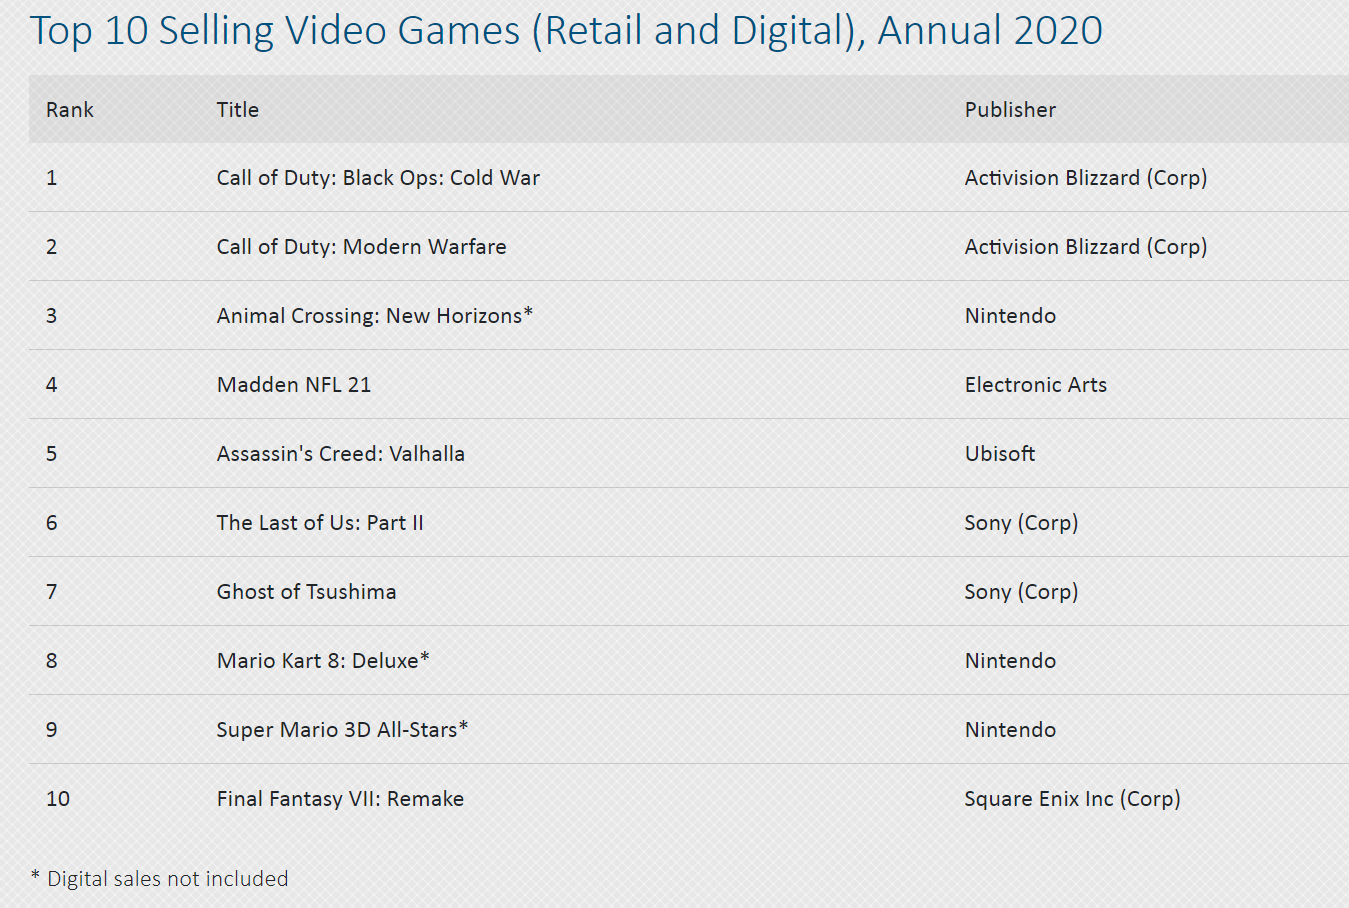

Source : https://www.npd.com/wps/portal/npd/us/news/top-10/video-games/

2020년의 매출 상위 10위 게임을 보면 블리자드, Electronic Arts, Ubisoft, Sony의 실적이 더 좋다. 굳이 닌텐도와 손잡을 필요는 없겠다. 

매출 상위권은 7위인 고스트 오브 쓰시마(신규 IP)를 제외하고 다 시리즈 프랜차이즈 게임이다. 

다들 시리즈를 우려먹고 있다. 안전해서일까? 

2020년에는 콜 오브 듀티의 매출이 가장 좋았다. 그렇다고 내년에 또 낼 수는 없는 법...! 포켓몬의 시대가 오는가...!

# 개인적인 분석 목표, 질문

In [ ]:
# Two Sample T-Test
import scipy.stats as stats
print("북미지역과 일본 비교 : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.JP_Sales))

In [ ]:
print("북미지역과 유럽 비교 : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.EU_Sales))

‼️ T-Test, 아노바는 평균 매기는거임... 장르별 랭킹 순위에는 적합하지 않다!

In [ ]:
# Anova

import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
F_statistic, pVal = stats.f_oneway(rank_by_sales.NA, rank_by_sales.EU, rank_by_sales.JP, rank_by_sales.Other) 
print('4개 그룹데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

❓ 왜 아노바 p값이 다 1이 나오지...
랭킹 매기면 다 랭킹이 1-12위 순이라 pvalue가 똑같이 나오나?? 

4개 그룹의 장르별 매출 순위를 아노바 테스트로 비교한 결과 pvalue는 1이다. 



‼️ 초기에 설정한 목표에 대한 결론이 나와야 함

그래서 다음 분기에는 어떤 게임을 만들건데?

연도별 출시되는 게임 수와 매출액 연관성 비교 - 2sample chi-square test

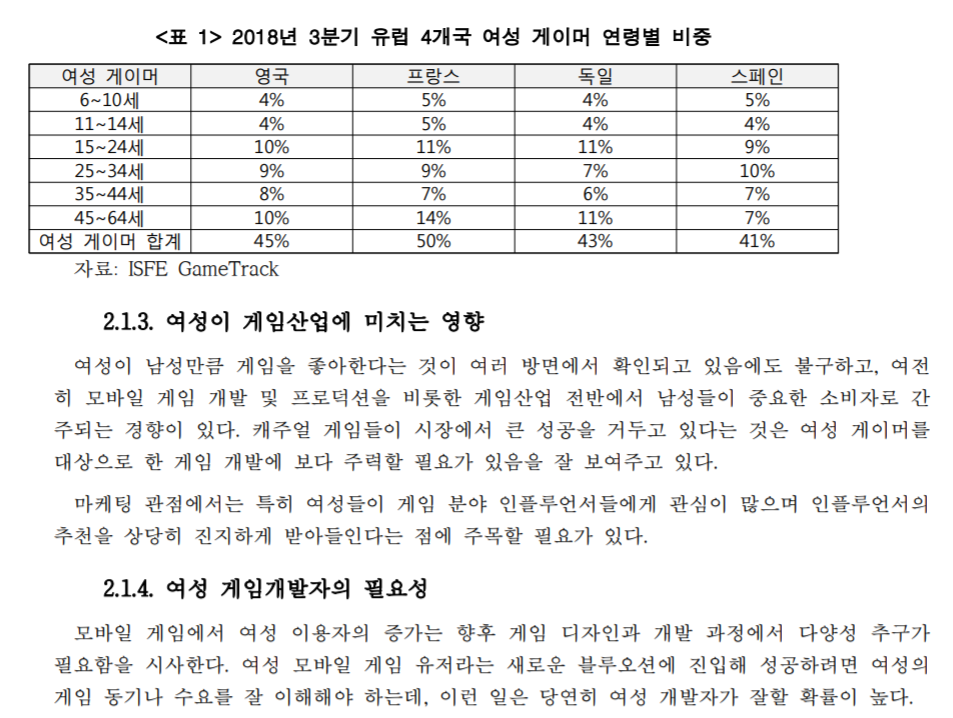

출처 : 북미 및 유럽 주요국 게임시장 현황조사, 2019